 "Customer Lifetime Value" which is a prediction of the net profit attributed to the entire future relationship with a customer. It is widely used in customer relationship management (CRM) and marketing strategy. In this case, the column 'cltv' could be the predicted value of the customer lifetime value for each customer in the dataset. This is an important metric for businesses as it helps them understand how much revenue they can expect to generate from a particular customer over the lifetime of their relationship.

In general, a higher CLTV value is considered better, as it indicates that a customer is likely to generate more revenue for the business over their lifetime. A high CLTV value suggests that the customer is loyal, has a high purchase frequency, and makes high-value purchases. This makes them more valuable to the company and thus a higher CLTV value is better. However, this depends on the business strategy, some companies may prefer to have lower CLTV customers if they want to increase the number of customers. Additionally, it's also important to consider the cost of acquiring a customer and the cost of servicing a customer when determining the profitability of a customer.

when u do eda, know about huge amount of outliers in claim amount (u can find it with boxcox) but there are in large amount so we keep as it is to not getting loss of info from the data.

** We can start eda by checking data size, shape, no.of cols, cols type, null values, duplicate rows, outliers, 

ditribution of data(count, hist, dist plot), ratio of each categorical features (balance or not, just getting sense), unique values of each col(especialy categorical), 

co-rrelation, multicolinearity,

Can I add more EDA steps on this data?

** Consider answer all of these below with respect to this dataset.
(and in general as well, if you wish)

Do I need to do standardization/ Normalization (for almost every dataset or it depends)?

when to use regularization?

when to set hyperparameter? (grid search /random search)

when to use cv(k fold)


Do we only check outliers for numerical data & not categorical or text?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

coefficients are only informative if the relationship between independent and dependent variables is linear. If the relationship is non-linear, the coefficients might not provide useful information about the relationship between the variables.

In [ ]:
from google.colab import files
data= files.upload()

Saving train_BRCpofr.csv to train_BRCpofr.csv


Took 2m 10s to upload 6MB file

In [ ]:
df= pd.read_csv('train_BRCpofr.csv')
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [ ]:
df._get_numeric_data()    #just get a sense of numerical features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [15]:
df.groupby('cltv').mean()       #not useful here
df.describe()    
df.describe(include='all')  #to get all details

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,89392.000000,89392,89392,89392,89392,89392.000000,89392.000000,89392.000000,89392,89392,89392,89392.000000
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,50497,62455,46247,52716,NaN,NaN,NaN,60263,56644,47796,NaN
mean,44696.500000,NaN,NaN,NaN,NaN,0.575488,4.595669,4351.502416,NaN,NaN,NaN,97952.828978
std,25805.391969,NaN,NaN,NaN,NaN,0.494272,2.290446,3262.359775,NaN,NaN,NaN,90613.814793
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,24828.000000
25%,22348.750000,NaN,NaN,NaN,NaN,0.000000,3.000000,2406.000000,NaN,NaN,NaN,52836.000000
50%,44696.500000,NaN,NaN,NaN,NaN,1.000000,5.000000,4089.000000,NaN,NaN,NaN,66396.000000
75%,67044.250000,NaN,NaN,NaN,NaN,1.000000,6.000000,6094.000000,NaN,NaN,NaN,103440.000000


In [ ]:
df.isnull().sum()     #checking null values count, found no null values

In [ ]:
#checking duplicates
df.duplicated().sum()     #no duplicates
# check for duplicates in the entire dataframe
'''duplicate_rows = df.duplicated()
print(duplicate_rows)'''

In [ ]:
#checking unique values in each col.
df.nunique()  

In [ ]:
#Further checking categorical data unique values
print(list(df['gender'].unique()))
print(list(df['area'].unique()))
print(list(df['qualification'].unique()))
print(list(df['num_policies'].unique()))
print(list(df['policy'].unique()))
print(list(df['type_of_policy'].unique()))
print(list(df['income'].unique()))
print(list(df['marital_status'].unique()))

['Male', 'Female']
['Urban', 'Rural']
['Bachelor', 'High School', 'Others']
['More than 1', '1']
['A', 'C', 'B']
['Platinum', 'Gold', 'Silver']
['5L-10L', 'More than 10L', '2L-5L', '<=2L']
[1, 0]


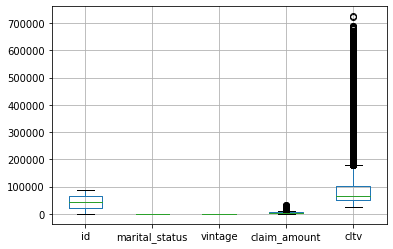

In [ ]:
#finding outliers
df.boxplot()

# checking outlier, not useful here
'''Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers)'''

Not getting sense , we can try whiskers plot on individual features to know about data variance and outliers.

In [ ]:
# checking correlation between columns
df.corr()
#It is typically used to measure the linear association between numerical variables & not for categorical
#Higher(in numbers) correlation (any sign) tells the higher effect on dependent variable 

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003634,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000


It tells, claim amount has high corr compare to others

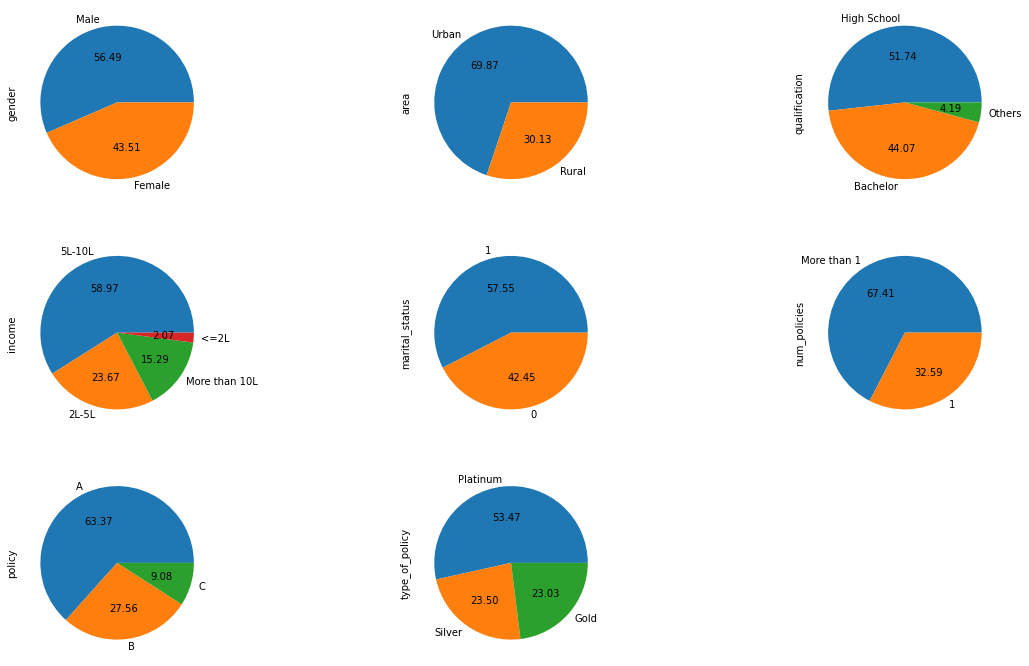

In [ ]:
# checking what are the pecentage of the each categories contribution in the column
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
df['gender'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(3,3,2)
df['area'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(3,3,3)
df['qualification'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(3,3,4)
df['income'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(3,3,5)
df['marital_status'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(3,3,6)
df['num_policies'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(3,3,7)
df['policy'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(3,3,8)
df['type_of_policy'].value_counts().plot(kind='pie',autopct='%.2f')

plt.show()

Independendent feature are not balanced, just for knowing about dataset

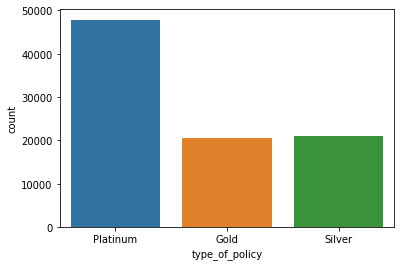

In [ ]:
#Can try count plot as well to check in numbers
plt.subplot(1,1,1)
sns.countplot(x=df['type_of_policy'])

plt.show()

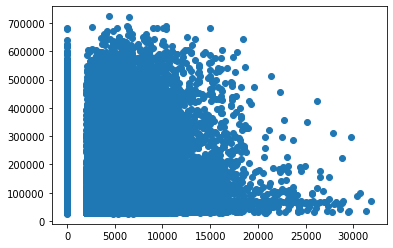

In [ ]:
plt.scatter(df['claim_amount'], df['cltv'])

#we can use pdf as well

cltv is decreasing when claim amount is increasing. But, sround 75% users claim amount is less than 7k (check df.describe) 

In [ ]:
#try build model with single feature to check feature importance, reshape is required for this.
#try only on numerical cols bcoz to work on categ cols, first u need to convert into numerical form
X= df['claim_amount']
y= df['cltv']
X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 10)

In [ ]:
'''X= df['vintage']
y= df['cltv']
X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 10)

X= df['marital_status']
y= df['cltv']
X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 10)'''

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#When applying linear regression with a single feature as input and target, you need to reshape the data so that it has the correct format for the model.
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
model.fit(X_train, y_train)
y_pr= model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pr)
print(r2)

0.007527722586860963


0.03222019068184112    clm amnt has higher importance

0.0006531512108858273   vintage

0.007527722586860963    m

#Encoding (cat to num)

In [ ]:
#About Encodings
#It's like a label encoding without library
#But, we will not use this, instead we use one-hot
'''for i in range (0, len(df)):
  if df['gender'][i]== 'Male':
    df['gender'][i]= 1
  else:
    df['gender'][i]= 0'''

#from sklearn.preprocessing import LabelEncoder
'''enc = OneHotEncoder()
enc.fit(['apple', 'banana', 'orange'])
enc.transform(['apple', 'banana', 'orange'])'''

#label enc
'''le = LabelEncoder()
le.fit(df['area'])          #urban= 1
df['area']= le.transform(df['area'])

le.fit(df['num_policies'])        #more than one= 1
df['num_policies']= le.transform(df['num_policies'])
df.head()'''

#we can do label enc as well but causes bias (1>0). So, here we should not use label on gender, area etc
#& can use on qualification, income etc bcoz we can give preference(value) to those

In [ ]:
#one hot using get_dummies
one_hot_data = pd.get_dummies(df, columns = ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy'])
one_hot_data.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,515400,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,64212,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,97920,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,59736,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X= one_hot_data.drop('cltv', axis=1)
y= one_hot_data['cltv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 10)

In [ ]:
y_test

58098     67272
46023     30888
52277     58056
84181     30492
75463    263364
          ...  
11733     66708
83316     93024
86312     32952
24137     41616
81393     69480
Name: cltv, Length: 26818, dtype: int64

In [ ]:
#we can try standardization
'''from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()
  
# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data using the scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)'''

#Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#now, fit model into train data
model.fit(X_train, y_train)     #X_train= al input vars, y_train= output var. of training data(70% of total data)

LinearRegression()

In [10]:
#Checking model performance on train data
from sklearn.metrics import r2_score
y_pred= model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(r2)

0.15313073207634098


In [11]:
#use model to predict the output for testing data
model.fit(X_train, y_train)
y_pred= model.predict(X_test)     #X_test= input vars, y_test= output var of test data
#u r using y_pred to predict y(outupt) values based on X_test 

In [12]:
#performance on test data
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.14980925407620427


No overfitting, bcoz on both train(0.1531) and test(0.1498) data, performance is similar not much difference.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

0.567338341493577


In [ ]:
# Evaluate the model's performance using metrics such as mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))


6926605200.65499


#Regularization with standardized data

Because of one hot encoding, it creates sparsity. To reduce, we can use regularization techniques or PCA technique.

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression(fit_intercept=False, normalize=True)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.09018394870249524


R2 score gives -ve score when try standardization and regularization. So, dropping the stdz, regul. ideas.

#SGD Regressor

In [ ]:

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(loss= 'squared_error', penalty=None, random_state= 42)
sgd_reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = sgd_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R-squared: ', r2)

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

R-squared:  -1.0861430602236765e+24
1285511186085.7598


SGD regressor Not working well, infact worse result

#Random Forest & linear SVM

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestClassifier class
rf = RandomForestRegressor(n_estimators=100, random_state= 0)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Use the model to predict the output for the testing data
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.09018394870249524


RF Not performing well

In [ ]:
#Linear SVM
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=0.1, C=1.0, max_iter=1000)

# fit the model to the training data
svm_reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

-0.07272974588845327
0.5037305446775625


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


not workin well

#Gradient boost

In [ ]:
#Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score  
r2 = r2_score(y_test, y_pred)
print(r2)

0.15813827967536553


In [ ]:
test_score = reg.score(X_test, y_test)
print("Test R-squared score:", test_score)

Test R-squared score: 0.15813827967536553


Gradient boosting is performing best